In [3]:
from fastai.basics import *
from fastai.gen_doc.nbdoc import *
# defaults.device = torch.device('cpu')

In [2]:
import fastai
fastai.__version__

'1.0.61'

## Vision


In [4]:
from fastai.vision import *

In [5]:
mnist = untar_data(URLs.MNIST_TINY)
tfms = get_transforms(do_flip=False)

In [6]:
print(URLs.MNIST_TINY + '.tgz')

http://files.fast.ai/data/examples/mnist_tiny.tgz


In [7]:
mnist.ls()

[PosixPath('/home/mengyuwsl/.fastai/data/mnist_tiny/labels.csv'),
 PosixPath('/home/mengyuwsl/.fastai/data/mnist_tiny/train'),
 PosixPath('/home/mengyuwsl/.fastai/data/mnist_tiny/valid'),
 PosixPath('/home/mengyuwsl/.fastai/data/mnist_tiny/test'),
 PosixPath('/home/mengyuwsl/.fastai/data/mnist_tiny/models')]



The dataset is set up with an ImageNet structure so we use it to load our training and validation datasets, then label, transform, convert them into ImageDataBunch and finally, normalize them.

What is ImageNet? It is an image database, in which each node of the hierarchy is depicted by hundreds and thousands of images. The project has been instrumental in advancing computer vision and deep learning research. The data is available for free to researchers for non-commercial use.

Here we create the data object by loading, merging, and manipulating the mnist data.

1. __from_folder:__ create an ItemList in path from the filenames
2. __split_by_folder:__ split the data depending on the folder (train or valid) where the filenames are.
3. __label_from_folder:__ give a label to each filename depending on its folder.
4. __transform:__ apply transformation to the X of the train and validation set.
5. __databunch:__ create an DataBunch by merging all datasets.
6. __normalize:__ normalize the training and testing data.

The output data is in a format of DataBunch.


In [8]:
data = (ImageList.from_folder(mnist)
        .split_by_folder()          
        .label_from_folder()
        # .transform(tfms, size=32)
        .databunch(num_workers=0)
        .normalize(imagenet_stats))

In [9]:
data.label_list

LabelLists;

Train: LabelList (709 items)
x: ImageList
Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28)
y: CategoryList
3,3,3,3,3
Path: /home/mengyuwsl/.fastai/data/mnist_tiny;

Valid: LabelList (699 items)
x: ImageList
Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28)
y: CategoryList
3,3,3,3,3
Path: /home/mengyuwsl/.fastai/data/mnist_tiny;

Test: None

Once your data is properly set up in a DataBunch, we can call data.show_batch() to see what a sample of a batch looks like.

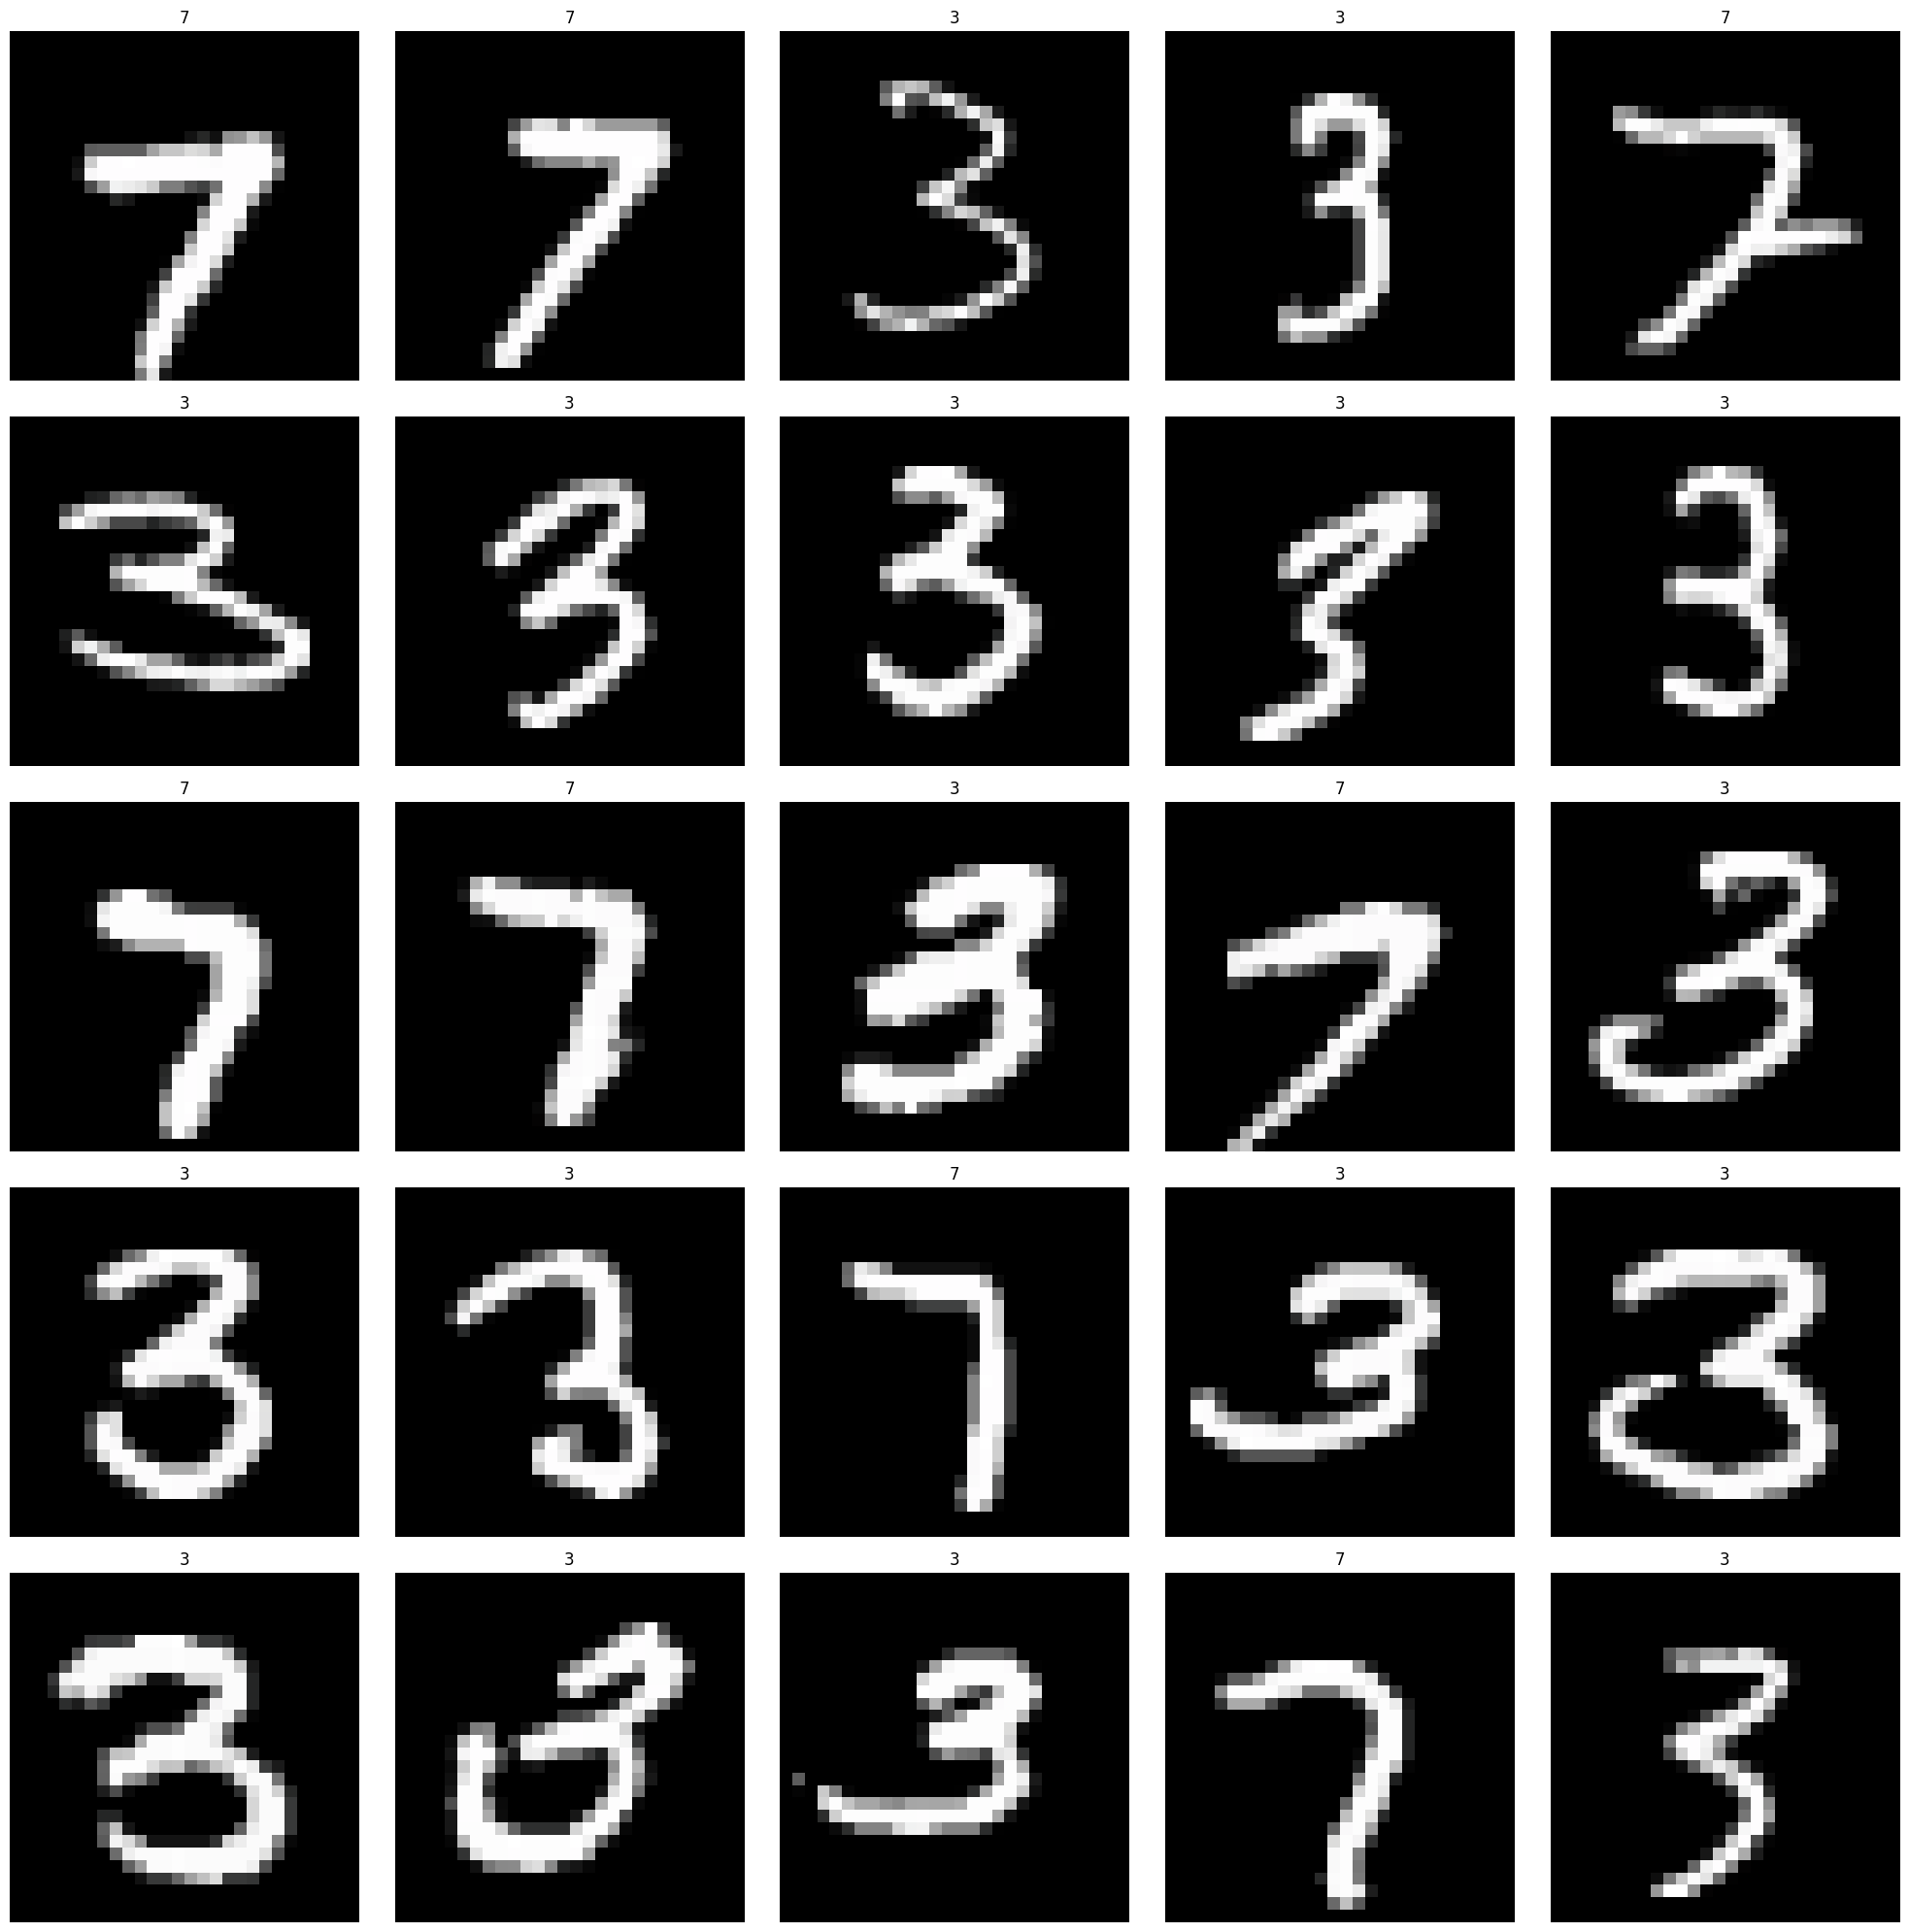

In [10]:


data.show_batch()



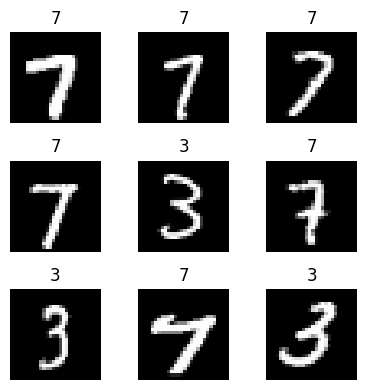

In [11]:


data.show_batch(rows=3, figsize=(4,4))



In [12]:


learn = cnn_learner(data, models.resnet18, metrics=accuracy)
# learn.fit_one_cycle(n_epoch=1,lr_max=1e-2)
learn.fit_one_cycle(cyc_len=50,max_lr=1e-2)
learn.save('mini_train')



/home/mengyuwsl/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:135: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and may be removed in the future. Please use keyword parameter(s) instead.
  warnings.warn(
/home/mengyuwsl/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /home/mengyuwsl/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:01<00:00, 34.5MB/s]


epoch,train_loss,valid_loss,accuracy,time
0,0.756150,0.350994,0.845494,00:03
1,0.541521,0.321940,0.856938,00:04
2,0.418696,0.284481,0.888412,00:03
3,0.330527,0.195230,0.939914,00:03
4,0.254111,0.158150,0.951359,00:02
5,0.207331,0.146988,0.959943,00:02
6,0.180791,0.151770,0.958512,00:02
7,0.154134,0.123500,0.975680,00:02
8,0.128860,0.146573,0.967096,00:02
9,0.109162,0.135377,0.957082,00:02


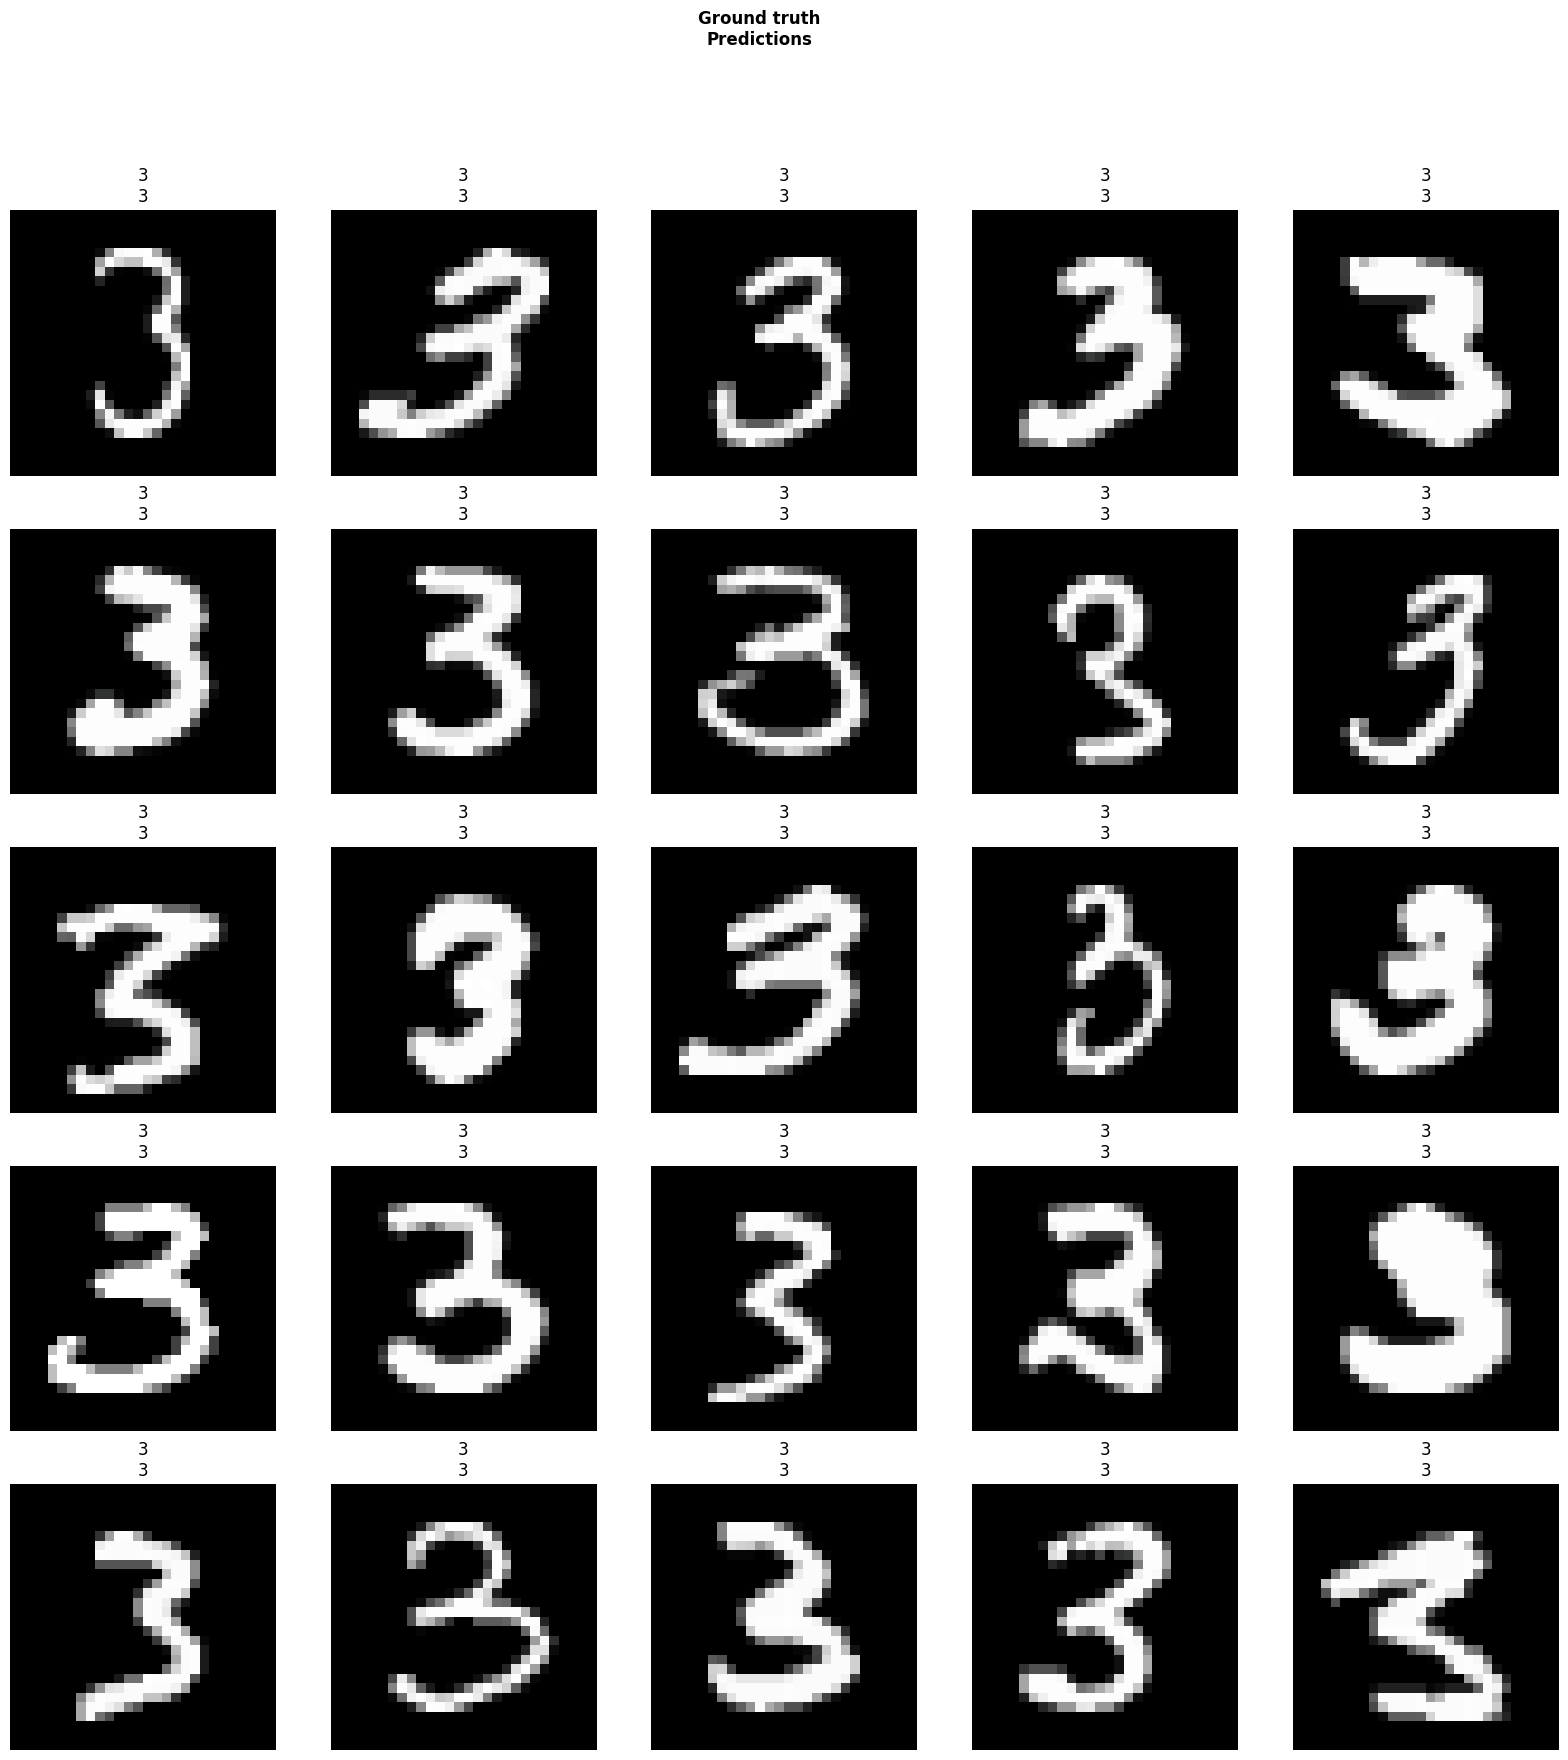

In [13]:
learn.show_results()


A multilabel problem

Now let's try these on the PLANET_TINY dataset. It is a tiny version of the planets dataset from the Kaggle competition Planet: Understanding the Amazon from Space for faster experimentation and prototyping.

The study area is the Amazon basin:

The task is to label satellite image chips with atmospheric conditions and 12 classes of land cover/land use, which is as follows:

This is a multilabel problem, as each image may contain one or more classes of land cover.


In [14]:


planet = untar_data(URLs.PLANET_TINY)
planet_tfms = get_transforms(flip_vert=True, max_lighting=0.1, max_zoom=1.05, max_warp=0.)



In [15]:


data = (ImageList.from_csv(planet, 'labels.csv', folder='train', suffix='.jpg')
        .split_by_rand_pct()
        .label_from_df(label_delim=' ')
        .transform(planet_tfms, size=128)
        .databunch(num_workers=0)
        .normalize(imagenet_stats))



ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (160,) + inhomogeneous part.

In [16]:
data.label_list

LabelLists;

Train: LabelList (709 items)
x: ImageList
Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28)
y: CategoryList
3,3,3,3,3
Path: /home/mengyuwsl/.fastai/data/mnist_tiny;

Valid: LabelList (699 items)
x: ImageList
Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28)
y: CategoryList
3,3,3,3,3
Path: /home/mengyuwsl/.fastai/data/mnist_tiny;

Test: None

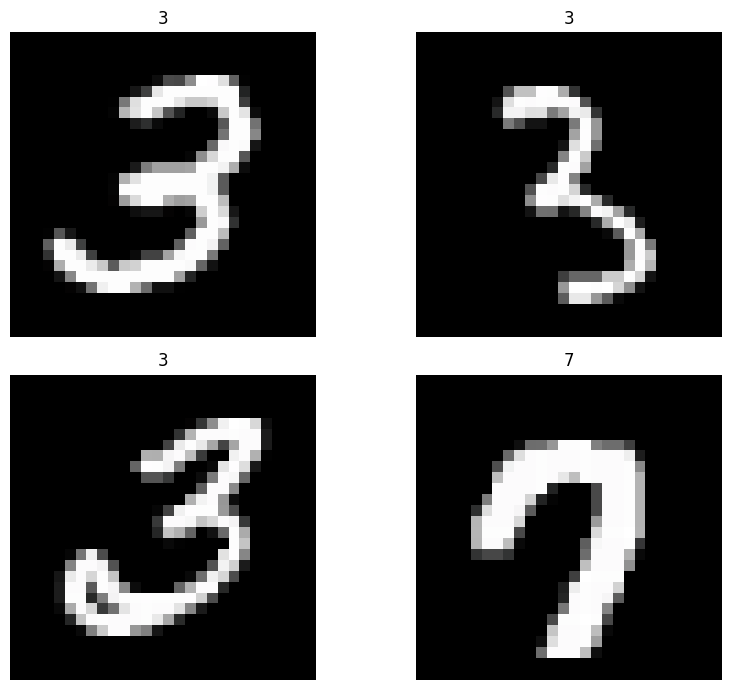

In [17]:


data.show_batch(rows=2, figsize=(9,7))



In [18]:


learn = cnn_learner(data, models.resnet18)
learn.fit_one_cycle(5,1e-2)
learn.save('mini_train')



/home/mengyuwsl/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:135: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and may be removed in the future. Please use keyword parameter(s) instead.
  warnings.warn(
/home/mengyuwsl/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,time
0,0.695281,0.123118,00:03
1,0.475920,0.196917,00:03
2,0.351169,0.128176,00:03
3,0.248562,0.074915,00:03
4,0.185534,0.081455,00:03


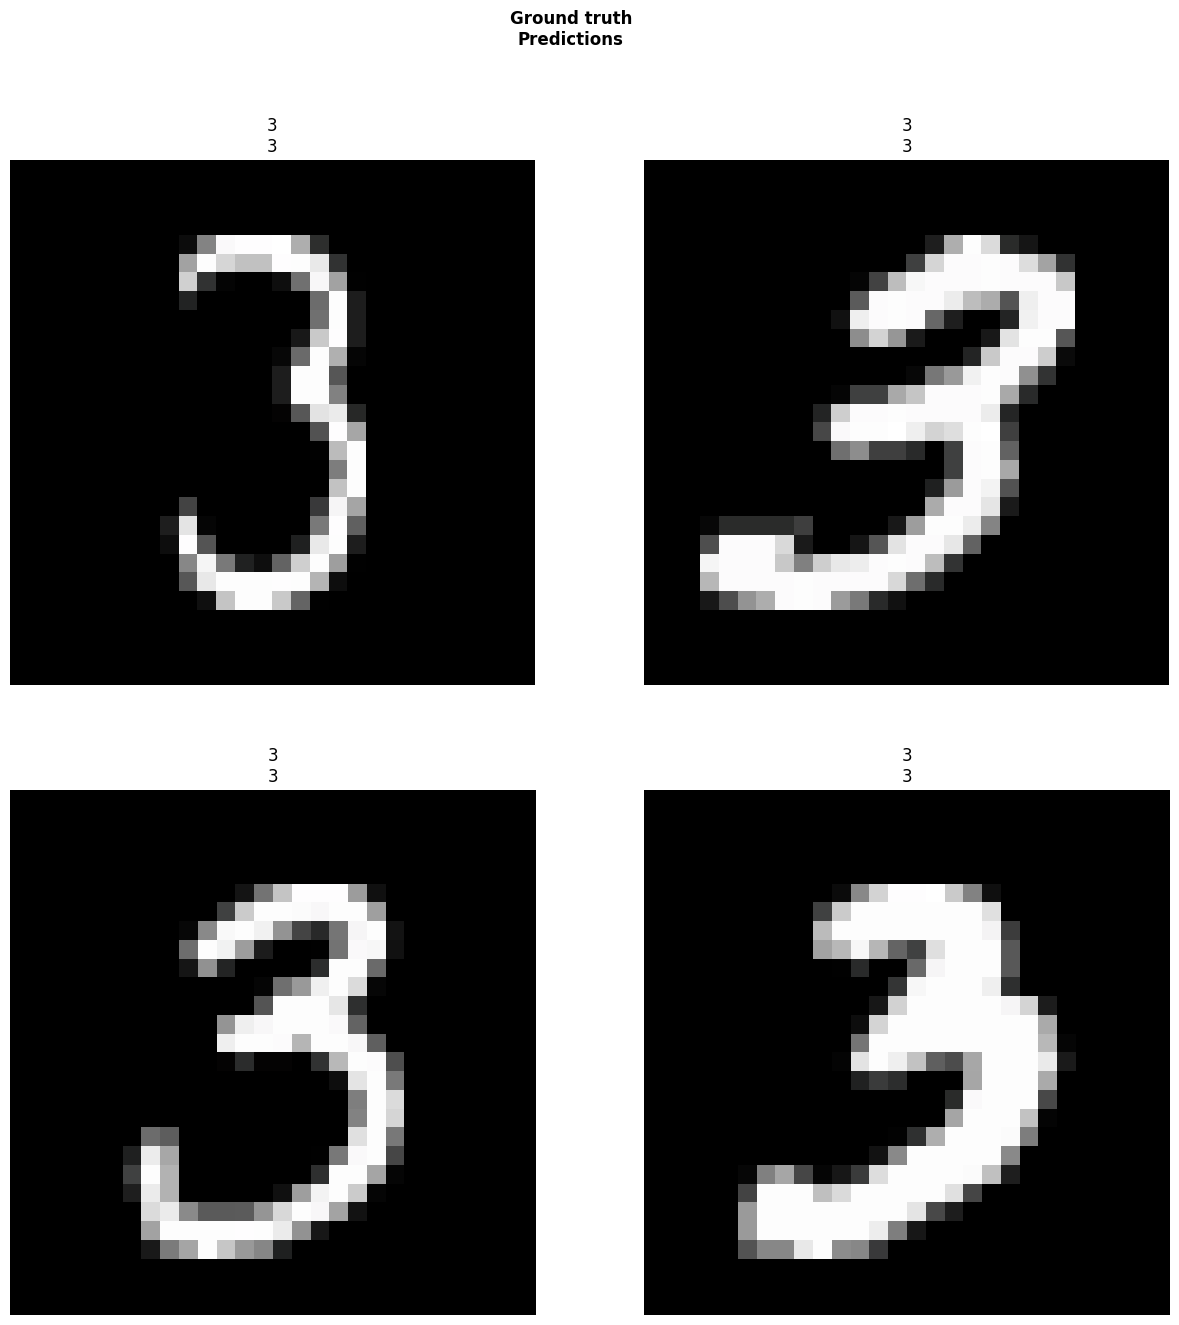

In [19]:
learn.show_results(rows=2, max_n=6, figsize=(15,15))

To grab our data, we use this dictionary to label our items. We also use the PointsItemList class to have the targets be of type ImagePoints (which will make sure the data augmentation is properly applied to them). When calling transform we make sure to set tfm_y=True.

In [20]:
biwi = untar_data(URLs.BIWI_SAMPLE)
fn2ctr = pickle.load(open(biwi/'centers.pkl', 'rb'))

In [21]:
data = (PointsItemList.from_folder(biwi)
        .split_by_rand_pct(seed=42)
        .label_from_func(lambda o:fn2ctr[o.name])
        # .transform(get_transforms(), tfm_y=True, size=(120,160))
        .databunch(num_workers=0)
        .normalize(imagenet_stats))

You can deactivate this warning by passing `no_check=True`.


/home/mengyuwsl/.local/lib/python3.10/site-packages/fastai/basic_data.py:262: UserWarning: There seems to be something wrong with your dataset, for example, in the first batch can't access any element of self.train_ds.
Tried: 13,51,158,16,78...
  warn(warn_msg)


In [22]:


data.show_batch(rows=3, figsize=(9,6))



TypeError: unsupported operand type(s) for /: 'numpy.ndarray' and 'Tensor'

In [23]:


learn = cnn_learner(data, models.resnet18, lin_ftrs=[100], ps=0.05)
learn.fit_one_cycle(10, 5e-2)
learn.save('mini_train')



/home/mengyuwsl/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:135: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and may be removed in the future. Please use keyword parameter(s) instead.
  warnings.warn(
/home/mengyuwsl/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,time


TypeError: unsupported operand type(s) for /: 'numpy.ndarray' and 'Tensor'

In [24]:


learn.show_results(rows=3)



TypeError: unsupported operand type(s) for /: 'numpy.ndarray' and 'Tensor'

In [25]:
camvid = untar_data(URLs.CAMVID_TINY)
path_lbl = camvid/'labels'
path_img = camvid/'images'

In [26]:


codes = np.loadtxt(camvid/'codes.txt', dtype=str)
get_y_fn = lambda x: path_lbl/f'{x.stem}_P{x.suffix}'



In [27]:


data = (SegmentationItemList.from_folder(path_img)
        .split_by_rand_pct()
        .label_from_func(get_y_fn, classes=codes)
        # .transform(get_transforms(), tfm_y=True, size=128)
        .databunch(bs=16, path=camvid, num_workers=0)
        .normalize(imagenet_stats))



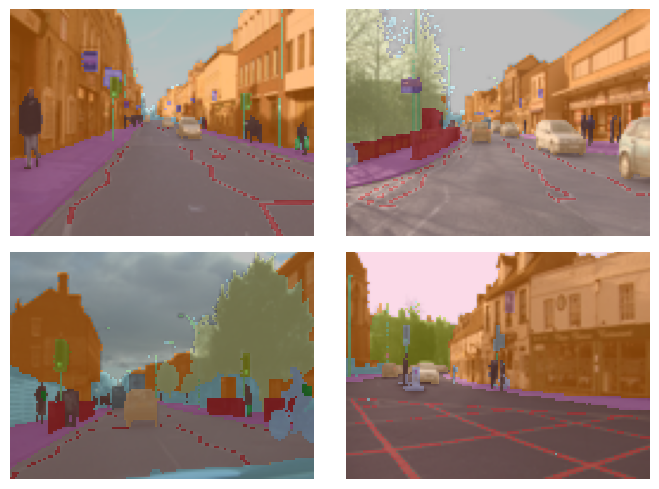

In [28]:


data.show_batch(rows=2, figsize=(7,5))



In [29]:


learn = unet_learner(data, models.resnet18)
learn.fit_one_cycle(3,1e-2)
learn.save('mini_train')



/home/mengyuwsl/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:135: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and may be removed in the future. Please use keyword parameter(s) instead.
  warnings.warn(
/home/mengyuwsl/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/home/mengyuwsl/.local/lib/python3.10/site-packages/torch/nn/utils/weight_norm.py:30: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


epoch,train_loss,valid_loss,time
0,5.875963,2.792886,00:22
1,4.095158,2.356300,00:22
2,3.335589,2.179362,00:22


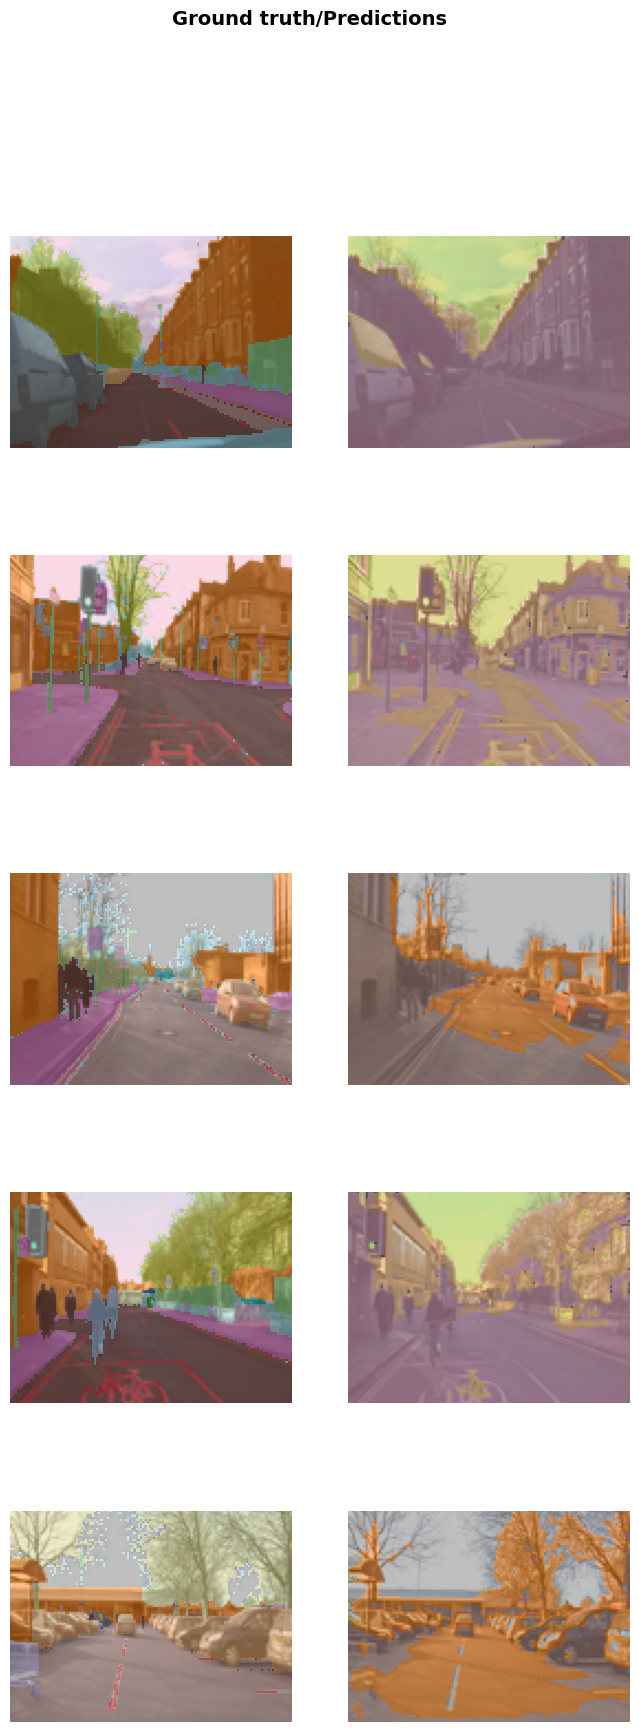

In [30]:
learn.show_results()


Now try to train a classifier on your own data

As the final task, we ask you to train your own image classifier. All you need to do is to create your own dataset with images. The dataset should have the structure described in this post. Once you create the dataset, follow the same steps as in the MNIST classification example above, but with your own path to folder, i.e.:

data = (ImageList.from_folder(**your_path_to_folder**)
        .split_by_folder()          
        .label_from_folder()
        .transform(tfms, size=32)
        .databunch(num_workers=0)


References

    Practical Deep Learning for Coders by fastai
    Deep Learning Specialisation by DeepLearning.AI on Coursera.
    AI for Everyone by Coursera

